🔴 Nota: He pulido un poco más el proceso de detección de anomalías respecto al ejercicio anterior del modelo supervisado, implementando Z-score para las variables con distribución normal e IQR para el resto.

# Importar librerias

In [1]:
# Importamos librerías
from google.colab import drive
from sklearn.preprocessing import LabelEncoder # Transformar categoricas a numericas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

# Carga de datos

Columns
Basic Attributes
* Species: Species of the iris flower (Setosa, Versicolor, Virginica)

Environmental Factors
* Elevation: Elevation level where the iris was found (in meters)
* Soil Type: Type of soil where the iris was found (Loamy, Sandy, Clayey)

Basic Morphological Features
* Sepal Length (cm): Length of the sepal in centimeters
* Sepal Width (cm): Width of the sepal in centimeters
* Petal Length (cm): Length of the petal in centimeters
* Petal Width (cm): Width of the petal in centimeters

Derived Morphological Features
* Sepal Area (cm^2): Area of the sepal calculated as Sepal Length × Sepal Width
* Petal Area (cm^2): Area of the petal calculated as Petal Length × Petal Width
* Sepal Aspect Ratio: Ratio of Sepal Length to Sepal Width
* Petal Aspect Ratio: Ratio of Petal Length to Petal Width
* Sepal-to-Petal Length Ratio: Ratio of Sepal Length to Petal Length
* Sepal-to-Petal Width Ratio: Ratio of Sepal Width to Petal Width
* Sepal-Petal Length Difference: Difference between Sepal Length and Petal Length
* Sepal-Petal Width Difference: Difference between Sepal Width and Petal Width

Advanced Morphological Features
* Petal Curvature (mm): Measure of petal curvature in millimeters
* Petal Texture (trichomes/mm^2): Number of trichomes per square millimeter on the petal
* Leaf Area (cm^2): Area of a typical leaf of the iris plant in square centimeters

Additional Derived Features
* Sepal Area Sqrt: Square root of the Sepal Area
* Petal Area Sqrt: Square root of the Petal Area
* Area Ratios: Custom attribute that captures various area ratios in the dataset


In [2]:
# Montamos y cargamos el fichero con los datos
drive.mount('/content/drive')
path = '/content/drive/MyDrive/Notebooks/intro_ia/Dataset_iris_extended.csv'

df = pd.read_csv(path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Descripción del Dataset

In [3]:
df.describe()

,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,173.543917,5.895900,3.052858,3.807950,1.189542,17.870807,5.689068,2.003853,4.016732,1.996762,5.422667,2.08795,1.863317,8.355267,15.052733,60.144650,4.208441,2.106480,15.755674
std,72.461258,0.845579,0.527120,1.765469,0.728882,3.388978,4.585312,0.507508,2.070668,1.035622,5.921786,1.27443,1.004847,3.172975,4.663109,10.224305,0.399956,1.119309,21.891577
min,50.100000,4.040000,1.700000,0.960000,0.050000,9.048000,0.086000,0.978774,1.587379,0.745902,0.841121,-1.55000,-0.340000,3.310000,3.830000,35.160000,3.007989,0.293258,0.818662
25%,110.875000,5.210000,2.690000,1.640000,0.360000,15.554550,0.565825,1.639104,2.855016,1.223277,1.650452,1.14000,1.090000,5.310000,11.280000,52.302500,3.943926,0.752213,2.005655
50%,171.300000,5.840000,3.030000,4.300000,1.290000,17.646400,5.525400,1.970738,3.448642,1.442773,2.170656,1.95500,1.590000,7.925000,15.020000,59.170000,4.200762,2.350617,3.059424
75%,239.125000,6.520000,3.390000,5.200000,1.740000,20.007275,9.256725,2.293932,4.486058,3.059940,9.251453,3.29000,2.740000,10.715000,18.527500,67.305000,4.472949,3.042487,30.764892
max,299.900000,9.120000,4.760000,7.840000,2.990000,29.722600,23.128000,4.082902,34.400000,5.410000,55.800000,4.66000,4.560000,17.890000,29.850000,86.930000,5.451844,4.809158,183.620930


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   species                          1200 non-null   object 
 1   elevation                        1200 non-null   float64
 2   soil_type                        1200 non-null   object 
 3   sepal_length                     1200 non-null   float64
 4   sepal_width                      1200 non-null   float64
 5   petal_length                     1200 non-null   float64
 6   petal_width                      1200 non-null   float64
 7   sepal_area                       1200 non-null   float64
 8   petal_area                       1200 non-null   float64
 9   sepal_aspect_ratio               1200 non-null   float64
 10  petal_aspect_ratio               1200 non-null   float64
 11  sepal_to_petal_length_ratio      1200 non-null   float64
 12  sepal_to_petal_width

In [5]:
df.head()

,species,elevation,soil_type,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,...,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios
0,setosa,161.8,sandy,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,...,3.146341,13.115385,3.52,3.15,5.33,18.33,53.21,4.194711,0.652993,41.265478
1,setosa,291.4,clay,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,...,3.581699,10.945946,3.95,3.68,5.90,20.45,52.53,4.711051,0.752396,39.205087
2,setosa,144.3,sandy,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,...,3.469388,7.368421,3.63,2.42,5.66,24.62,50.25,3.778889,0.747395,25.563910
3,setosa,114.6,clay,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,...,3.032680,20.235294,3.11,3.27,4.51,22.91,50.85,3.995197,0.510000,61.367166
4,setosa,110.9,loamy,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,...,3.943089,11.038462,3.62,2.61,4.03,21.56,40.57,3.730885,0.565509,43.525641


In [6]:
print('ESPECIES DISTINTAS:', df['species'].nunique())
print('SUELOS DISTINTOS:', df['soil_type'].nunique())

ESPECIES DISTINTAS: 3
SUELOS DISTINTOS: 3


# Preparación de datos

In [7]:
# En algún punto más adelante podría ser necesario normalizar, pero podría ser relevante hacerlo aquí en futuros ejercicios
"""
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['altura', 'peso']] = scaler.fit_transform(df[['altura', 'peso']])
"""

df.drop_duplicates(inplace=True) # En éste caso no hay duplicados

## Transformación de variables categóricas en variables numéricas

In [8]:
# Vamos a transformar "species" y "soil_type" a int para poder trabajar con ellas mejor en adelante

ndf = df.copy() # NewDataFrame a parte para no alterar más el df original

# Mantengo la variable con 3 categorías, pero en numérico "0", "1" y "2"
_especies = LabelEncoder()
ndf['especies'] = _especies.fit_transform(ndf['species'])

# Transformo los 3 tipos de suelo en 3 variables booleanas diferentes
ndf = pd.get_dummies(ndf, columns=['soil_type'], drop_first=False)

In [9]:
ndf.head()

,species,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,...,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios,especies,soil_type_clay,soil_type_loamy,soil_type_sandy
0,setosa,161.8,5.16,3.41,1.64,0.26,17.5956,0.4264,1.513196,6.307692,...,5.33,18.33,53.21,4.194711,0.652993,41.265478,0,False,False,True
1,setosa,291.4,5.48,4.05,1.53,0.37,22.1940,0.5661,1.353086,4.135135,...,5.90,20.45,52.53,4.711051,0.752396,39.205087,0,True,False,False
2,setosa,144.3,5.10,2.80,1.47,0.38,14.2800,0.5586,1.821429,3.868421,...,5.66,24.62,50.25,3.778889,0.747395,25.563910,0,False,False,True
3,setosa,114.6,4.64,3.44,1.53,0.17,15.9616,0.2601,1.348837,9.000000,...,4.51,22.91,50.85,3.995197,0.510000,61.367166,0,True,False,False
4,setosa,110.9,4.85,2.87,1.23,0.26,13.9195,0.3198,1.689895,4.730769,...,4.03,21.56,40.57,3.730885,0.565509,43.525641,0,False,True,False


## Separación de características y etiquetas

In [10]:
# Variable objetivo: especies

ndf = ndf.drop(['species'], axis=1, errors='ignore') # Quito species para agilizar

x = ndf.drop('especies', axis=1)
y = ndf['especies']

print('EJE X:', x.columns.tolist())
print('EJE Y (especies):', y.unique())

EJE X: ['elevation', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'sepal_petal_length_diff', 'sepal_petal_width_diff', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'sepal_area_sqrt', 'petal_area_sqrt', 'area_ratios', 'soil_type_clay', 'soil_type_loamy', 'soil_type_sandy']
EJE Y (especies): [0 1 2]


In [11]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   elevation                        1200 non-null   float64
 1   sepal_length                     1200 non-null   float64
 2   sepal_width                      1200 non-null   float64
 3   petal_length                     1200 non-null   float64
 4   petal_width                      1200 non-null   float64
 5   sepal_area                       1200 non-null   float64
 6   petal_area                       1200 non-null   float64
 7   sepal_aspect_ratio               1200 non-null   float64
 8   petal_aspect_ratio               1200 non-null   float64
 9   sepal_to_petal_length_ratio      1200 non-null   float64
 10  sepal_to_petal_width_ratio       1200 non-null   float64
 11  sepal_petal_length_diff          1200 non-null   float64
 12  sepal_petal_width_di

## Detección de Anomalías.

In [12]:
# Usaré Z-score para eliminar outliers
# Z-score supone normalidad, haré una pequeña prueba de normalidad (SHAPIRO-WILK) para cada especie

import scipy.stats as stats

normalidad = {} # diccionario para almacenar las variables normales

for especie in ndf['especies'].unique():
  group = ndf[ndf['especies'] == especie]
  print(f'\nESPECIE:{especie}')

  for col in group.select_dtypes(include='number').columns:
    # Prueba de Shapiro-Wilk
    shapiro_stat, shapiro_p = stats.shapiro(group[col].dropna())
    #shapiro_test = stats.shapiro(group[col]) # Otra forma

    print(f'{col}: p={shapiro_p:.4f} => {"Normal" if (shapiro_p > 0.05) else "No normal"}')

    # Guardar resultados
    normalidad[f"{especie}_{col}"] = {
        "Shapiro-Wilk p-valor": round(shapiro_p, 4),

        "Normalidad (p > 0.05)": shapiro_p > 0.05
    }


ESPECIE:0
elevation: p=0.0000 => No normal
sepal_length: p=0.6395 => Normal
sepal_width: p=0.0401 => No normal
petal_length: p=0.5881 => Normal
petal_width: p=0.0802 => Normal
sepal_area: p=0.5347 => Normal
petal_area: p=0.0042 => No normal
sepal_aspect_ratio: p=0.0000 => No normal
petal_aspect_ratio: p=0.0000 => No normal
sepal_to_petal_length_ratio: p=0.0000 => No normal
sepal_to_petal_width_ratio: p=0.0000 => No normal
sepal_petal_length_diff: p=0.5990 => Normal
sepal_petal_width_diff: p=0.1134 => Normal
petal_curvature_mm: p=0.1147 => Normal
petal_texture_trichomes_per_mm2: p=0.1190 => Normal
leaf_area_cm2: p=0.5800 => Normal
sepal_area_sqrt: p=0.3447 => Normal
petal_area_sqrt: p=0.5249 => Normal
area_ratios: p=0.0000 => No normal
especies: p=1.0000 => Normal

ESPECIE:1
elevation: p=0.0000 => No normal
sepal_length: p=0.3941 => Normal
sepal_width: p=0.6390 => Normal
petal_length: p=0.5186 => Normal
petal_width: p=0.2988 => Normal
sepal_area: p=0.0214 => No normal
petal_area: p=0.0

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


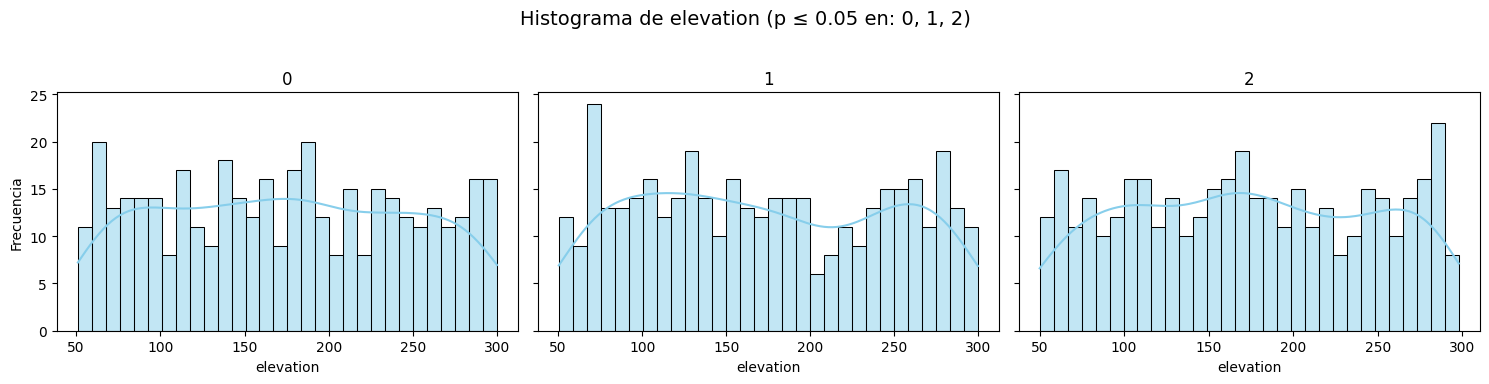

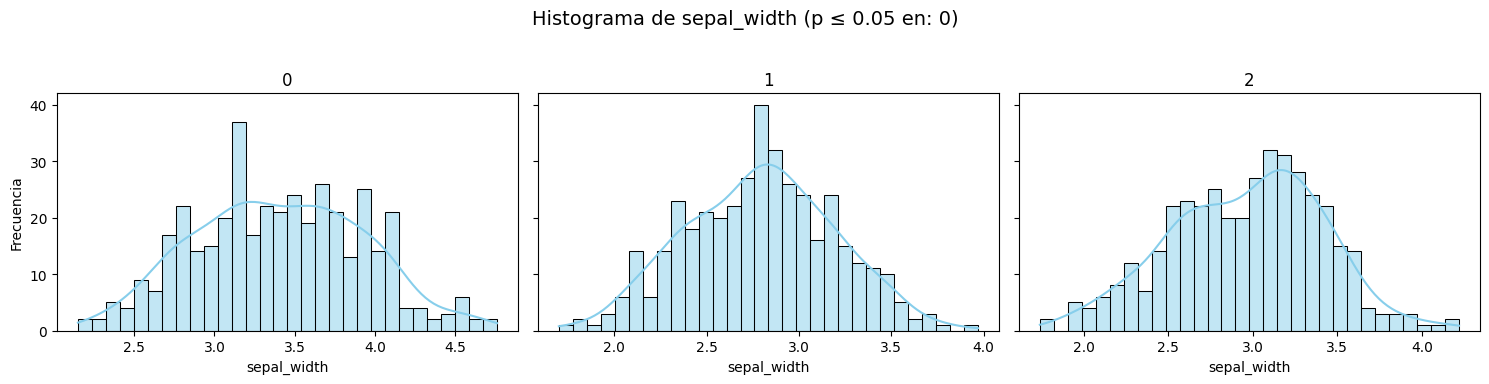

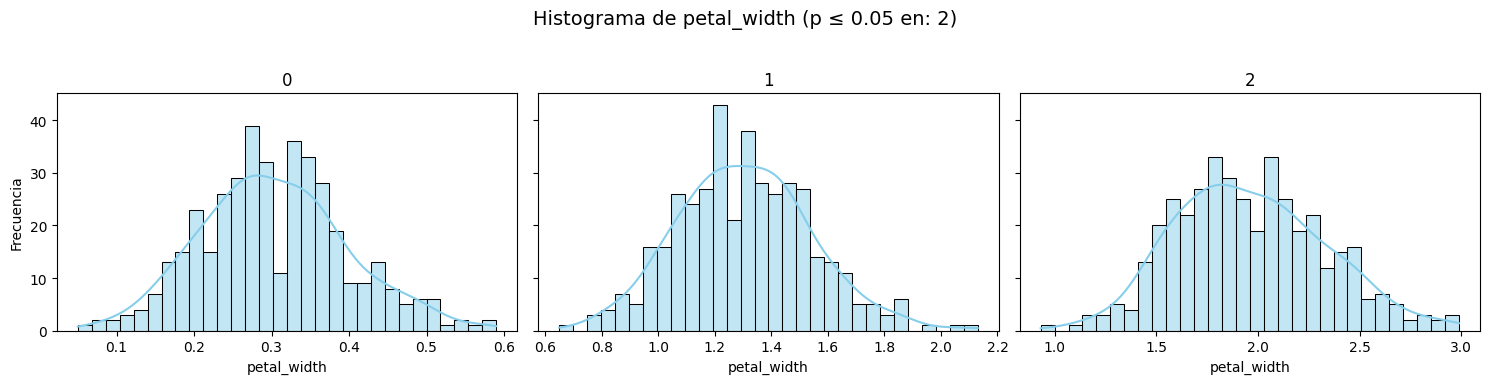

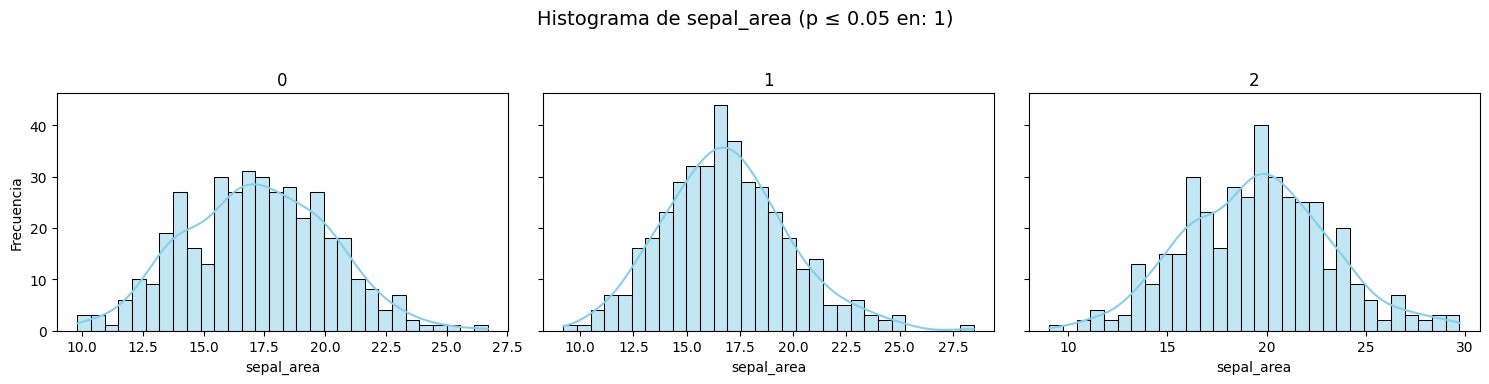

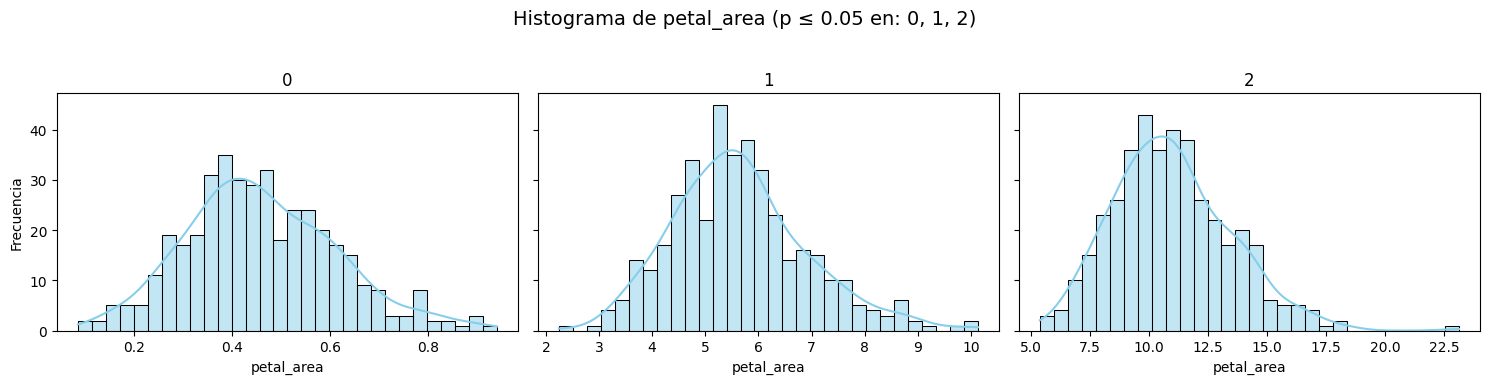

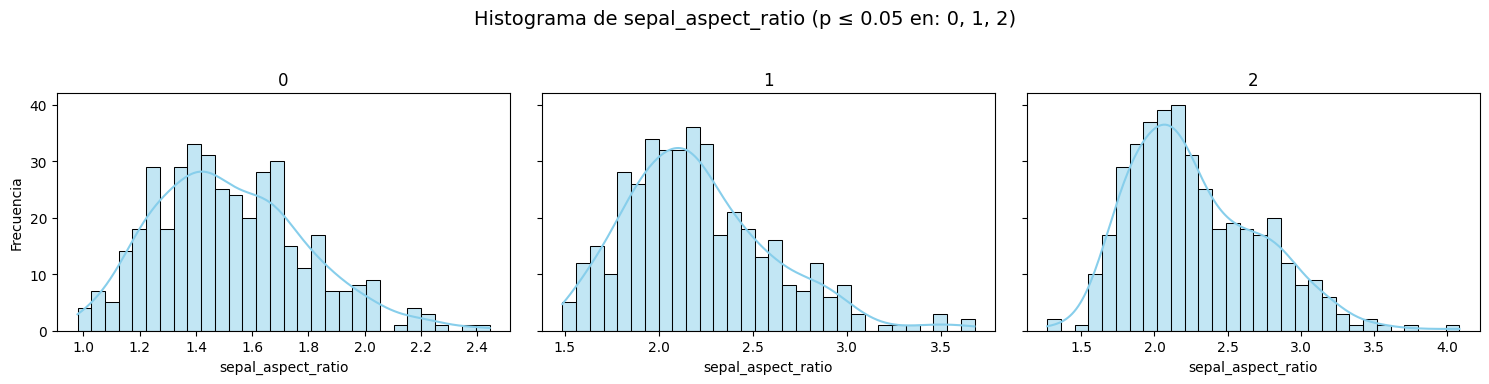

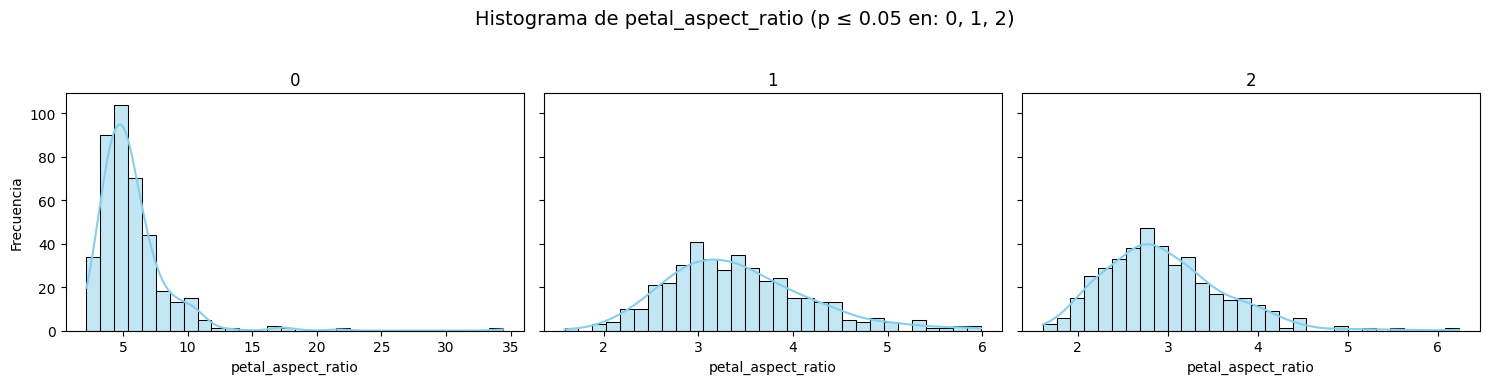

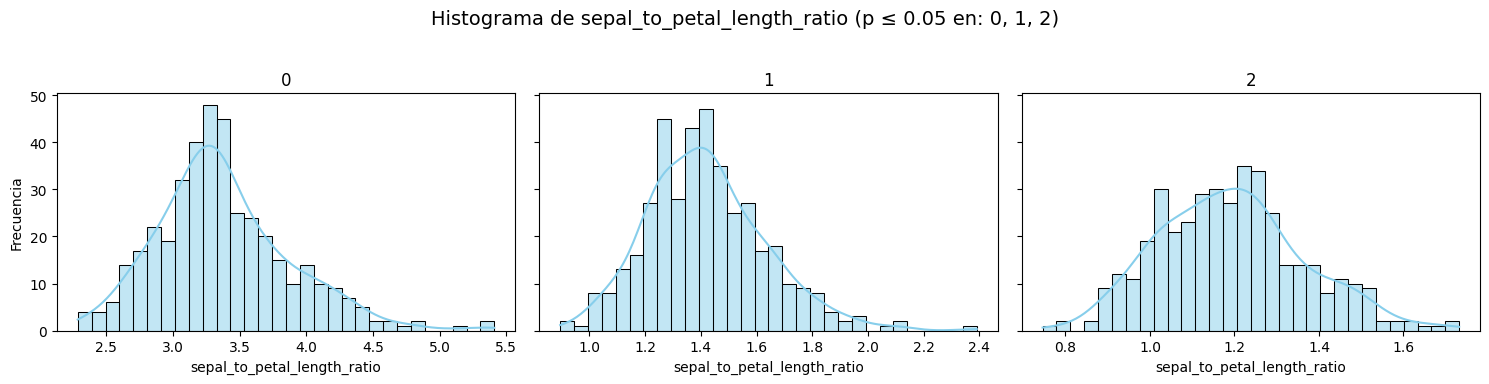

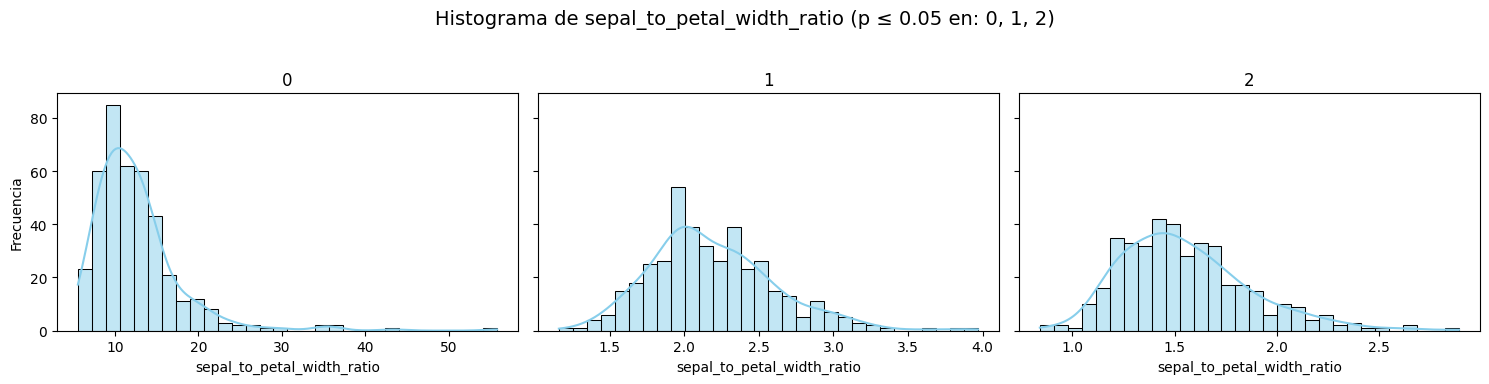

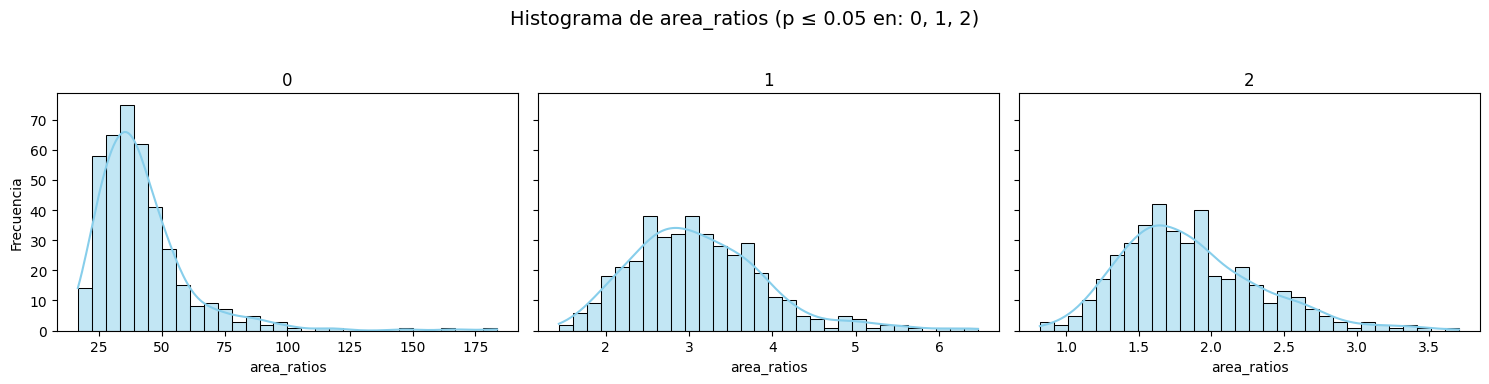

In [13]:
# El código no es mío
# Examinamos visualmente las variables que no han pasado el test anterior

import matplotlib.pyplot as plt
import seaborn as sns

especies = ndf['especies'].unique()
variables = ndf.select_dtypes(include='number').columns

for col in variables:
    # Buscar especies donde la variable no es normal según el diccionario
    no_normales = [esp for esp in especies if not normalidad.get(f"{esp}_{col}", {}).get("Normalidad (p > 0.05)", True)]

    if no_normales:
        fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
        fig.suptitle(f'Histograma de {col} (p ≤ 0.05 en: {", ".join(map(str, no_normales))})', fontsize=14)

        for i, especie in enumerate(especies):
            grupo = ndf[ndf['especies'] == especie]
            sns.histplot(grupo[col], kde=True, bins=30, ax=axes[i], color='skyblue')
            axes[i].set_title(f'{especie}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

🔴 Podemos concluir que, según la prueba de Shapiro-Wilk y un examen visual, las variables de ratios no siguen normalidad (p ~= 0), y puesto que Z-score supone normalidad, no voy a eliminar los outliers que me de Z-score sobre estas variables. Para ello usaré otro método.

In [14]:
from scipy.stats import zscore

# Excluimos las variables no normales
excluir = ['especies', 'elevation', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'area_ratios']


vars_zscore = ndf.select_dtypes(include='number').drop(columns=excluir)

# Aplicamos Z-score
gruposz = ndf.groupby('especies')[vars_zscore.columns].transform(zscore)

outliers = (gruposz.abs() > 3)

print(outliers.sum())

# Filas con al menos un True (es decir, algún outlier en alguna columna)
_outliers = outliers.any(axis=1)
# Nuevo dataframe limpio
nndf1 = ndf[~_outliers].copy() # NewNewDataFrame

nndf1 = nndf1.drop(['especies', 'elevation', 'sepal_aspect_ratio', 'petal_aspect_ratio', 'sepal_to_petal_length_ratio', 'sepal_to_petal_width_ratio', 'area_ratios'], axis=1)

sepal_length                       3
sepal_width                        0
petal_length                       2
petal_width                        3
sepal_area                         2
petal_area                         5
sepal_petal_length_diff            2
sepal_petal_width_diff             3
petal_curvature_mm                 4
petal_texture_trichomes_per_mm2    6
leaf_area_cm2                      2
sepal_area_sqrt                    2
petal_area_sqrt                    5
dtype: int64


In [15]:
nndf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1167 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   sepal_length                     1167 non-null   float64
 1   sepal_width                      1167 non-null   float64
 2   petal_length                     1167 non-null   float64
 3   petal_width                      1167 non-null   float64
 4   sepal_area                       1167 non-null   float64
 5   petal_area                       1167 non-null   float64
 6   sepal_petal_length_diff          1167 non-null   float64
 7   sepal_petal_width_diff           1167 non-null   float64
 8   petal_curvature_mm               1167 non-null   float64
 9   petal_texture_trichomes_per_mm2  1167 non-null   float64
 10  leaf_area_cm2                    1167 non-null   float64
 11  sepal_area_sqrt                  1167 non-null   float64
 12  petal_area_sqrt          

🔴 Vamos a eliminar los outliers de las variables no gaussianas, y para ello voy a valorar 3 posibles alternativas adecuadas para la naturaleza de las variables que me quedan:


*   IQR (Rango intercuantílico). No es necesario normalizar.
*   Isolation Forest. Funcionaría bien pero hay que normalizar, y todavía no se me ha pedido.
*   Autoencoder: Igual, es un modelo muy potente pero hay que normalizar antes.

Debido a que aún no se me pide normalizar, usaré IQR:



In [16]:
# Excluimos las variables normales
excluirr = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area', 'sepal_petal_length_diff',
           'sepal_petal_width_diff', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'sepal_area_sqrt', 'petal_area_sqrt'
           ]

#ndff = df.copy()

vars_iqr = ndf.select_dtypes(include='number').drop(columns=excluirr)


Q1 = vars_iqr.quantile(0.25)
Q3 = vars_iqr.quantile(0.75)
IQR = Q3 - Q1
limite_inf= Q1 - (1.5 * IQR)
limite_sup = Q3 + (1.5 * IQR)
outliers_iqr=vars_iqr[(vars_iqr < limite_inf) | (vars_iqr > limite_sup)]
outliers_iqr.fillna(False, inplace=True)

print(outliers_iqr.sum())



_outliers_iqr = outliers_iqr.any(axis=1)
# Nuevo dataframe limpio
nndf2 = ndf[~_outliers_iqr].copy()
nndf2 = nndf2.drop(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'sepal_area', 'petal_area', 'sepal_petal_length_diff',
                    'sepal_petal_width_diff', 'petal_curvature_mm', 'petal_texture_trichomes_per_mm2', 'leaf_area_cm2', 'sepal_area_sqrt',
                    'petal_area_sqrt', 'soil_type_clay', 'soil_type_loamy', 'soil_type_sandy'], axis=1)

elevation                               0
sepal_aspect_ratio              49.544271
petal_aspect_ratio             743.331352
sepal_to_petal_length_ratio             0
sepal_to_petal_width_ratio     645.439066
area_ratios                    2440.59585
especies                                0
dtype: object


<ipython-input-16-6162eb75544b>:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  outliers_iqr.fillna(False, inplace=True)
<ipython-input-16-6162eb75544b>:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  outliers_iqr.fillna(False, inplace=True)


In [17]:
nndf2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1105 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   elevation                    1105 non-null   float64
 1   sepal_aspect_ratio           1105 non-null   float64
 2   petal_aspect_ratio           1105 non-null   float64
 3   sepal_to_petal_length_ratio  1105 non-null   float64
 4   sepal_to_petal_width_ratio   1105 non-null   float64
 5   area_ratios                  1105 non-null   float64
 6   especies                     1105 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 69.1 KB


In [18]:
# Fusionamos en un mismo dataframe y ordenamos
nndf = pd.merge(nndf1, nndf2, left_index=True, right_index=True, how='outer')
nnndf = nndf[ndf.columns] # Ordenamos columnas como en ndf

# Eliminamos filas con nan
cdf = nnndf.dropna().copy() # Clear Data Frame

In [19]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1077 entries, 0 to 1199
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   elevation                        1077 non-null   float64
 1   sepal_length                     1077 non-null   float64
 2   sepal_width                      1077 non-null   float64
 3   petal_length                     1077 non-null   float64
 4   petal_width                      1077 non-null   float64
 5   sepal_area                       1077 non-null   float64
 6   petal_area                       1077 non-null   float64
 7   sepal_aspect_ratio               1077 non-null   float64
 8   petal_aspect_ratio               1077 non-null   float64
 9   sepal_to_petal_length_ratio      1077 non-null   float64
 10  sepal_to_petal_width_ratio       1077 non-null   float64
 11  sepal_petal_length_diff          1077 non-null   float64
 12  sepal_petal_width_diff   

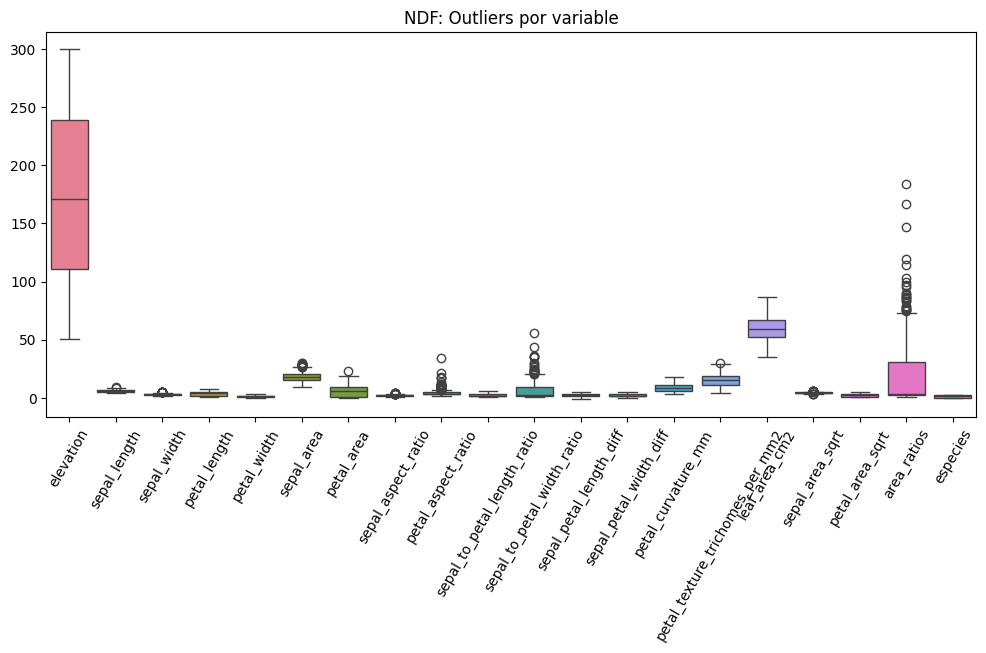

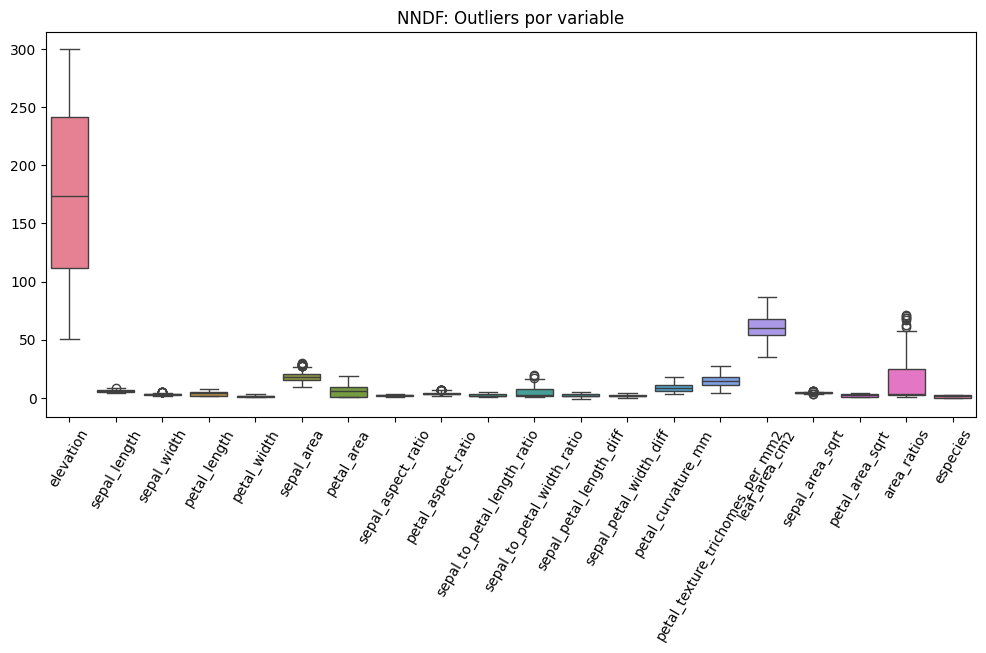

In [20]:
"""
import seaborn as sns
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(12,5))
sns.boxplot(data=ndf.select_dtypes(include='number'))
plt.xticks(rotation=60)
plt.title("NDF: Outliers por variable")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(data=cdf.select_dtypes(include='number'))
plt.xticks(rotation=60)
plt.title("NNDF: Outliers por variable")
plt.show()

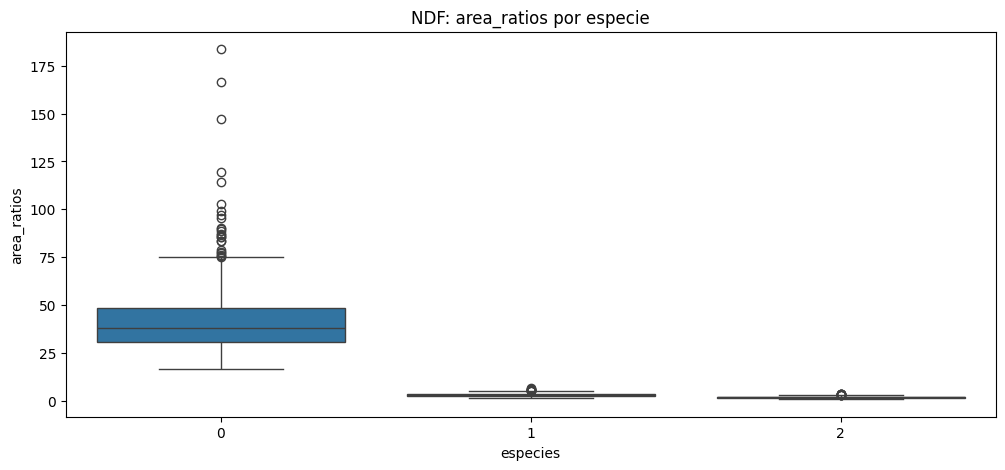

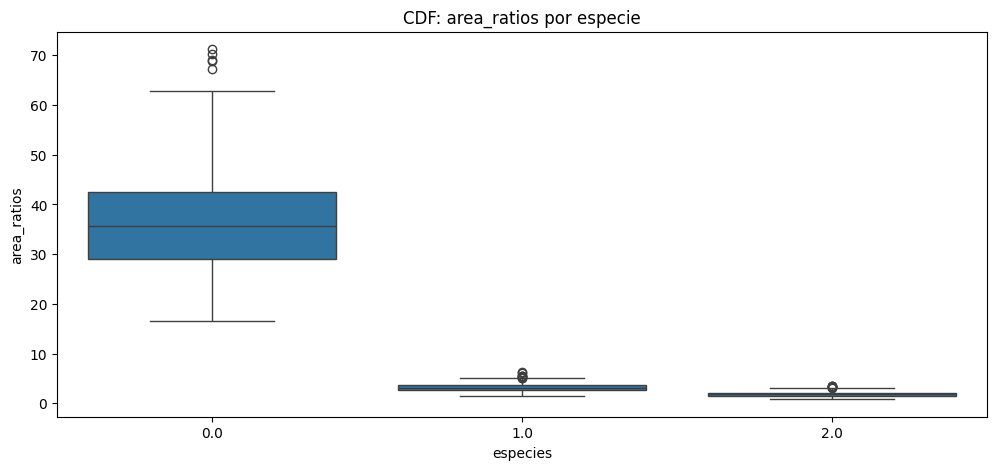

In [21]:
# Vamos a comprobar en una variable específica si se han borrado outliers o no
"""
import seaborn as sns
import matplotlib.pyplot as plt
"""
plt.figure(figsize=(12, 5))
sns.boxplot(data=ndf, x='especies', y='area_ratios')
plt.title("NDF: area_ratios por especie")
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(data=cdf, x='especies', y='area_ratios')
plt.title("CDF: area_ratios por especie")
plt.show()

🔴 Aquí se puede apreciar, en contraste con el ejercicio del modelo supervisado donde usé Z-score, la diferencia entre los outliers que detecta y elimina Z-score contra los que elimina IQR (mucho más preciso).

## Estandarización de los datos

In [22]:
from sklearn.preprocessing import StandardScaler

X = cdf.drop('especies', axis=1)
Y = cdf['especies']

estandarizar = X.select_dtypes(include='float64').columns
no_estandarizar = X.select_dtypes(include='bool').columns

# Iniciamos el escalador
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[estandarizar])

scaled_df = pd.DataFrame(X_scaled, columns=estandarizar, index=X.index)
non_scaled = X[no_estandarizar]

# Juntamos las variables estandarizadas y las no estandarizadas
X_final = pd.concat([scaled_df, non_scaled], axis=1)

# Nuevo dataframe estandarizado
sdf = pd.concat([X_final, y], axis=1) # Standarized Data Frame

# Mostrar resultado
sdf.head()


,elevation,sepal_length,sepal_width,petal_length,petal_width,sepal_area,petal_area,sepal_aspect_ratio,petal_aspect_ratio,sepal_to_petal_length_ratio,sepal_to_petal_width_ratio,sepal_petal_length_diff,sepal_petal_width_diff,petal_curvature_mm,petal_texture_trichomes_per_mm2,leaf_area_cm2,sepal_area_sqrt,petal_area_sqrt,area_ratios,especies
0,-0.188484,-0.929958,0.724690,-1.350473,-1.422585,-0.104484,-1.254174,-1.050916,2.424244,1.246111,2.042356,1.240237,1.426819,-1.035216,0.759092,-0.768077,-0.058298,-1.454652,1.772828,0
1,1.594430,-0.544454,1.990534,-1.414760,-1.265643,1.269108,-1.222925,-1.386750,0.458124,1.683170,1.532252,1.586805,1.981439,-0.853199,1.215525,-0.836022,1.248798,-1.361819,1.646841,0
2,-0.429233,-1.002240,-0.481817,-1.449826,-1.251375,-1.094889,-1.224603,-0.404393,0.216753,1.570420,0.691061,1.328894,0.662909,-0.929838,2.113320,-1.063840,-1.110938,-1.366489,0.812724,0
4,-0.888718,-1.303416,-0.343365,-1.590089,-1.422585,-1.202574,-1.278019,-0.680286,0.997161,2.045973,1.554005,1.320834,0.861735,-1.450341,1.454507,-2.031064,-1.232459,-1.536355,1.911030,0
5,-0.152716,-1.231133,0.289557,-1.221898,-1.294178,-0.681802,-1.203934,-0.996405,1.525231,0.737574,1.101570,0.861431,1.102419,-0.763788,0.799999,-1.274670,-0.658440,-1.310968,0.720750,0


## Reducción de dimensionalidad PCA (opcional)
Obtener las componentes principales que aglutinen mas del 90% de la varianza de la señal original

In [23]:
# Vuelvo a separar la variable objetivo de las x en SDF
X = sdf.drop('especies', axis=1)
Y = sdf['especies']

Varianza explicada por componente: [0.61582181 0.16640998]


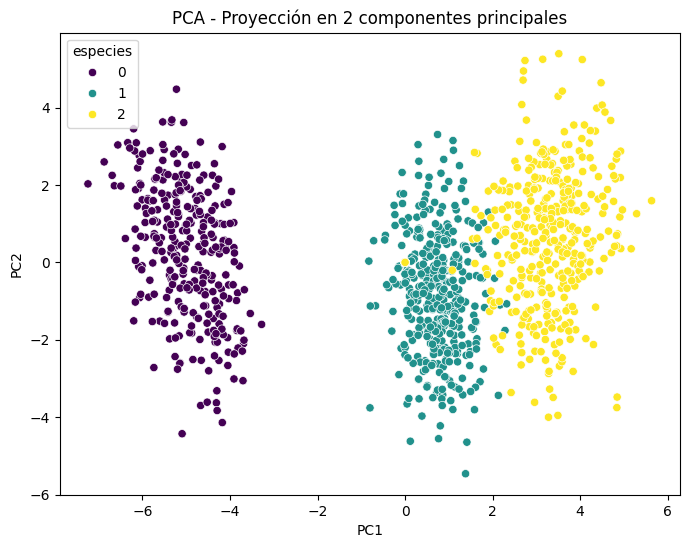

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Pipeline con imputación, escalado y PCA a 2 componentes
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    #('scaler', StandardScaler()), # Ya escalado anteriormente
    ('pca', PCA(n_components=2))
])

# 3. Ajustar y transformar X con el pipeline
X_pca = pipeline.fit_transform(X)

# 4. Crear DataFrame con PCs y la variable objetivo
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=X.index)
pca_df['especies'] = Y

# 5. Mostrar varianza explicada
pca = pipeline.named_steps['pca']
print("Varianza explicada por componente:", pca.explained_variance_ratio_)

# 6. Visualizar
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='especies', palette='viridis')
plt.title('PCA - Proyección en 2 componentes principales')
plt.show()

🔴 A pesar de haber eliminado los outliers de la manera más adecuada para el tipo de distribución de cada variable, parece que cuando se hizo en el ejercicio anterior (modelo supervisado) con Z-score para todas las variables, los clústeres se podían diferenciar mejor.

# K-Means

Ahora realizamos k-means partiendo de la base que se sabe que son 3 agrupaciones:

In [25]:
from sklearn.cluster import KMeans

# Según hemos visto en la PCA, usaremos un número de clústers k=3

# Limpiamos sdf y filtramos las variables no numéricas
sdf = sdf.dropna()
kM_df = sdf.drop(columns=['especies'])

kmeans = KMeans(n_clusters=3, random_state=69, n_init='auto')
labels = kmeans.fit_predict(kM_df)

sdf['cluster'] = labels # Guardamos K-Means en sdf

<ipython-input-25-c65ad11a6f37>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['cluster'] = labels # Guardamos K-Means en sdf


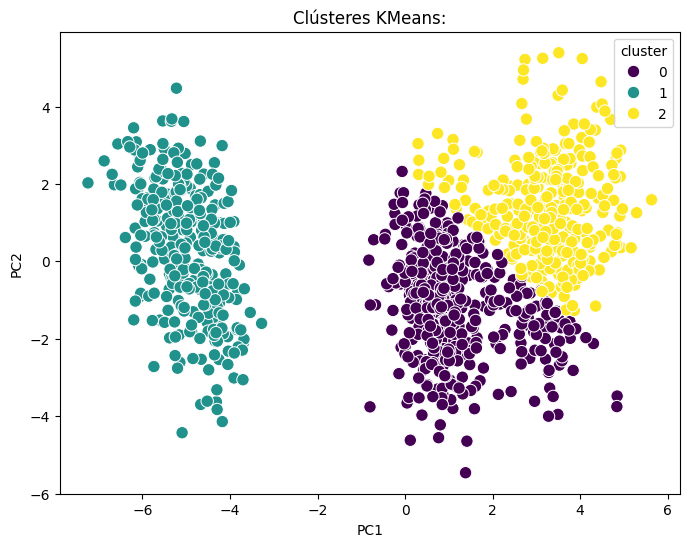

In [26]:
# Representaremos lo obtenido en K-Means con un análisis de componentes principales (PCA)

# Reducimos dimensionalidad a 2 componentes principales
pca = PCA(n_components=2)
X_pca = pca.fit_transform(kM_df)

# Lo ponemos en un DataFrame para facilitar la representación
df_pca = sdf.copy()
df_pca['PC1'] = X_pca[:, 0]
df_pca['PC2'] = X_pca[:, 1]

# Gráfico scatter con seaborn, coloreando por cluster
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='viridis', s=80)
plt.title('Clústeres KMeans:')
plt.show()

## Representación de los vectores de los tres centroides

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


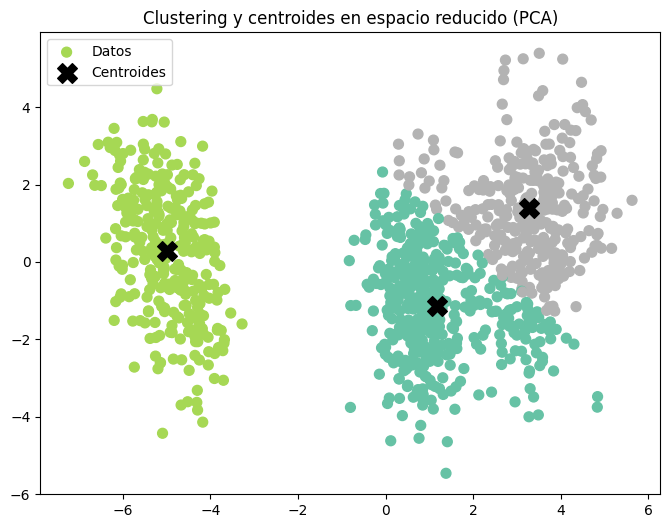

In [27]:
centroides = kmeans.cluster_centers_

pca = PCA(n_components=2)
X_2D = pca.fit_transform(kM_df)
centroides_2D = pca.transform(centroides)

# Plot con los puntos y los centroides
plt.figure(figsize=(8, 6))
plt.scatter(X_2D[:, 0], X_2D[:, 1], c=labels, cmap='Set2', s=50, label='Datos')
plt.scatter(centroides_2D[:, 0], centroides_2D[:, 1], c='black', s=200, marker='X', label='Centroides')
plt.title("Clustering y centroides en espacio reducido (PCA)")
plt.legend()
plt.show()


🔴 Podemos ver que K-Means no se ha adaptado del todo bien a en los clústeres que estan más a la derecha, ésto es debido a la naturaleza circular del algoritmo, que lo hace seleccionar parte de los puntos del otro clúster pero que se encuentran cerca del centroide. Ésto ocurre con ambos clústeres (el 0 y el 2), que se "roban" puntos el uno al otro.

## Representación de las predicciones

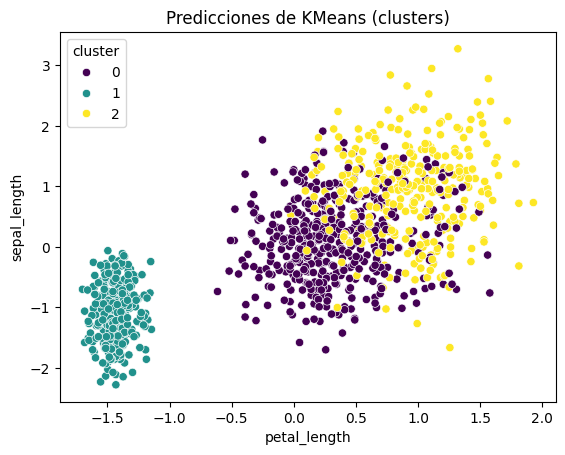

In [28]:
# Representación de las predicciones
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=sdf, x='petal_length', y='sepal_length', hue='cluster', palette='viridis')
plt.title("Predicciones de KMeans (clusters)")
plt.show()


In [29]:
from sklearn.metrics import silhouette_score

# Performance del clustering
silhouette_avg = silhouette_score(kM_df, sdf['cluster'])
print(f"Silhouette Score del modelo: {silhouette_avg:.3f}")

Silhouette Score del modelo: 0.328


🔴 Podemos ver cómo la clusterización K-Means se acerca al PCA pero no termina de ajustarse (con una puntuación aceptable de 0.328). Considero que es un problema de K-Means porque, por ejemplo en éste último gráfico de predicciones, petal_length en los clústeres 0 y 2 están sólo ligeramente separados.

🔴 Podemos interpretar también que de hecho el error es muy similar al que aparecía arriba en PCA con los resultados de K-Means (recta diagonal separando los dos centroides de los clústeres 0 y 2).

## Interpretación de las agrupaciones obtenidas

Este código crea un mapa de calor que muestra los valores promedio de cada característica para cada clúster, lo que puede ser útil para entender las diferencias y similitudes entre los clústeres encontrados por el algoritmo de agrupamiento:



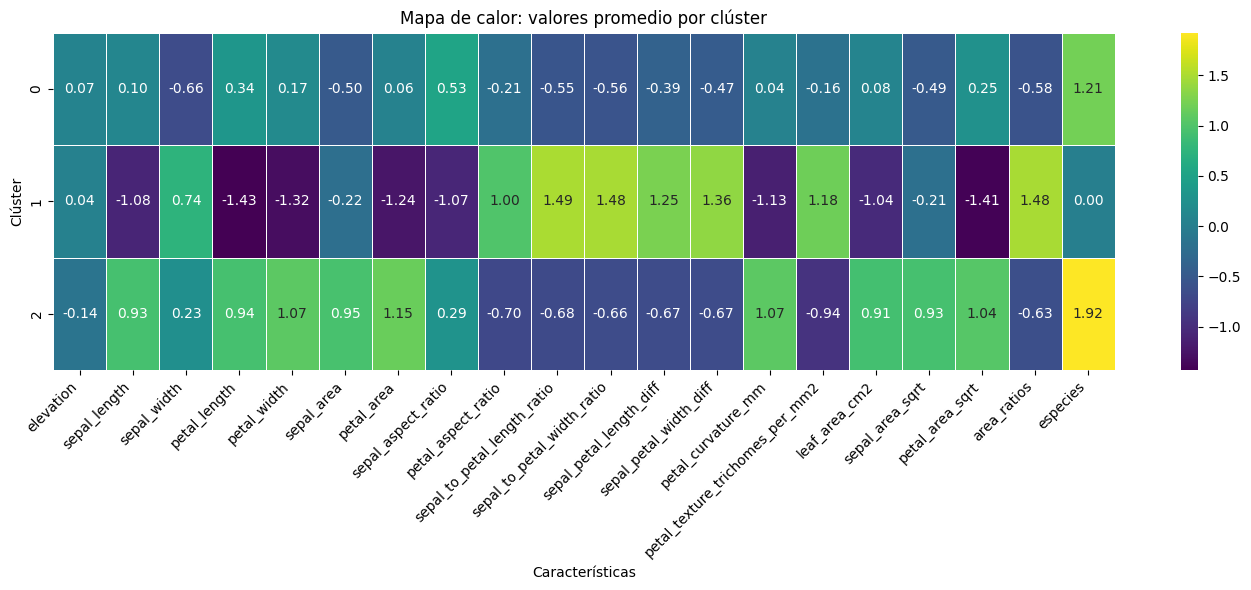

In [30]:
cluster_means = sdf.groupby('cluster').mean()

# Creamos el mapa de calor
plt.figure(figsize=(14, 6))
sns.heatmap(cluster_means, cmap='viridis', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor: valores promedio por clúster")
plt.xlabel("Características")
plt.ylabel("Clúster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

🔴 Pueden verse claramente las difrencias entre cústeres, a la vez que una clara semejanza entre cada categoría con otras del mismo tipo y diferenciación con las de ptro tipo (por ejemplo, las de petal suele tener la misma distribución en todas las categorías de pétalos, pero no sépalos, y los ratios y diff igual podrían considerarse parte de un grupo, pero no con petal_curvature_mm)

Este código crea un gráfico de barras con líneas de error que muestran los valores promedio y la desviación estándar de cada característica para cada clúster. Esto puede ser útil para entender las diferencias y similitudes entre los clústeres encontrados por el algoritmo de agrupamiento:


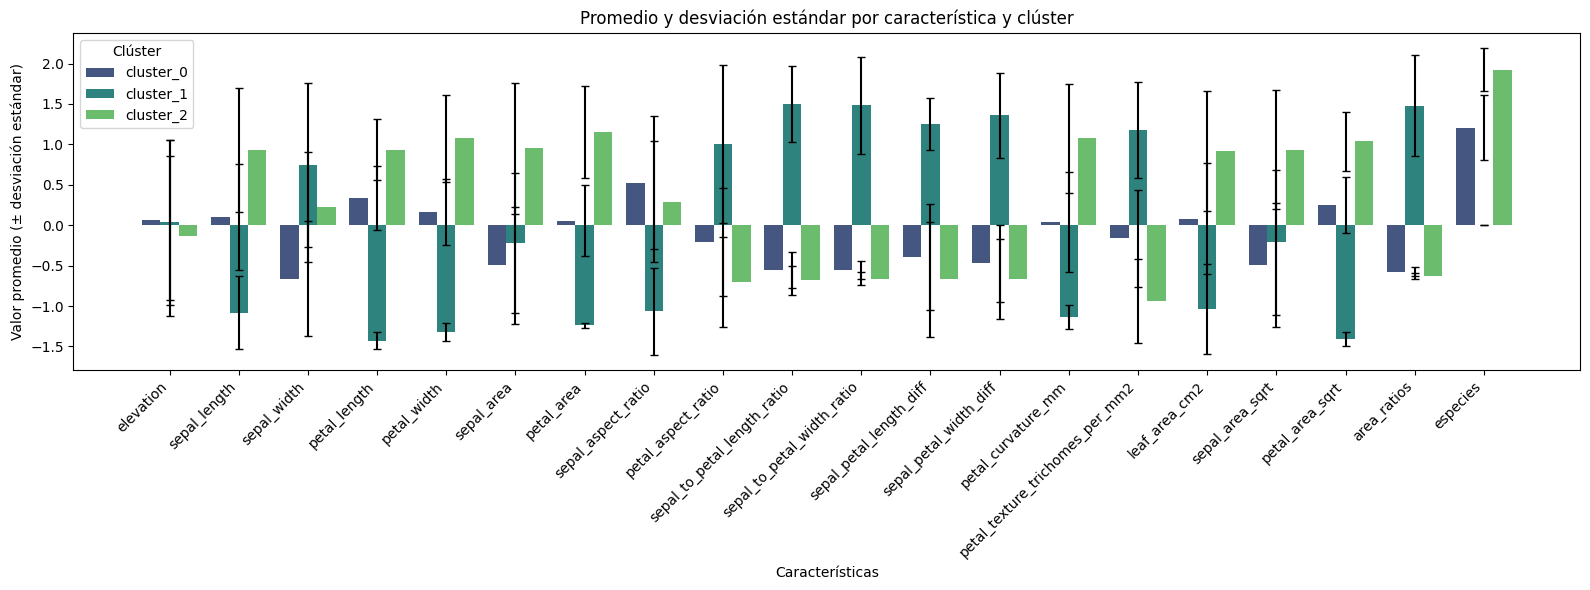

In [31]:
cluster_stats = sdf.groupby('cluster').agg(['mean', 'std']) # Media y desviación estándar

cluster_stats = cluster_stats.T.reset_index()
cluster_stats.columns = ['feature', 'stat', 'cluster_0', 'cluster_1', 'cluster_2']
cluster_stats = pd.melt(cluster_stats, id_vars=['feature', 'stat'], var_name='cluster', value_name='value')

means = cluster_stats[cluster_stats['stat'] == 'mean']
stds = cluster_stats[cluster_stats['stat'] == 'std']

# Dataframe con la media y la desviación estándar
plot_df = means.copy()
plot_df['std'] = stds['value'].values

# Barras
plt.figure(figsize=(16, 6))
sns.barplot(data=plot_df, x='feature', y='value', hue='cluster', errorbar=None, capsize=0.1, palette='viridis')

# Líneas
for i in range(len(plot_df)):
    row = plot_df.iloc[i]
    plt.errorbar(x=i % len(plot_df['feature'].unique()), y=row['value'], yerr=row['std'], fmt='none', c='black', capsize=3)

plt.title("Promedio y desviación estándar por característica y clúster")
plt.ylabel("Valor promedio (± desviación estándar)")
plt.xlabel("Características")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clúster')
plt.tight_layout()
plt.show()


# Clustering jerárquico

Este código aplica un algoritmo de agrupamiento jerárquico a los datos transformados por PCA, y luego genera una visualización del dendrograma resultante. Esto puede ser útil para entender la estructura de los clústeres y cómo se van formando a medida que se aumenta el nivel de agrupamiento:



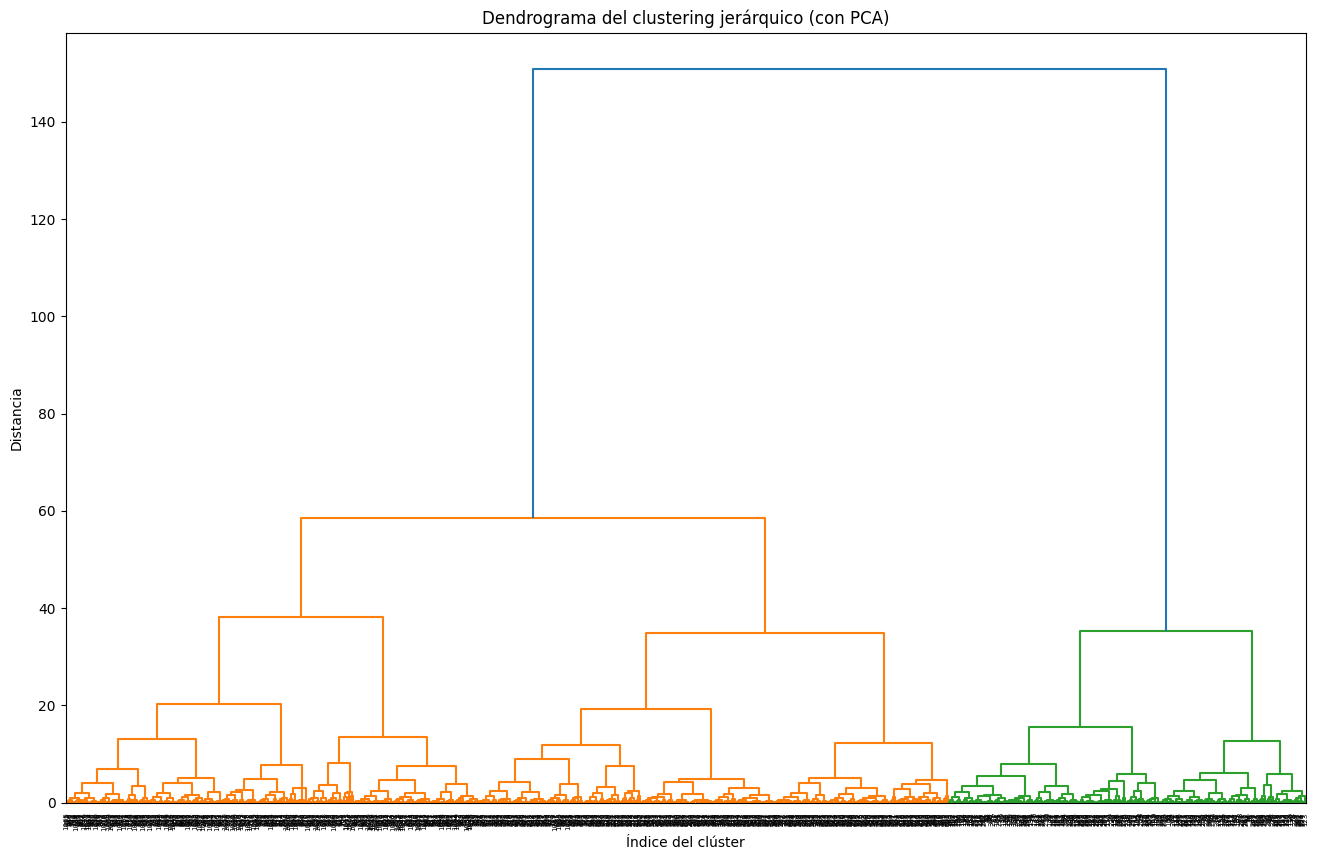

In [32]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

# Reducimos a 2 dimensiones con PCA para visualización (puedes usar más si quieres para el dendrograma)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(sdf.drop(columns=['cluster'], errors='ignore'))  # Asegúrate de eliminar la columna cluster si ya existe

# Aplicamos clustering jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')
sdf['cluster_model'] = model.fit_predict(X_pca)


# Dendrograma:
z = linkage(X_pca, method='ward')

# Visualización:
plt.figure(figsize=(16, 10))
dendrogram(z, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrograma del clustering jerárquico (con PCA)")
plt.xlabel("Índice del clúster")
plt.ylabel("Distancia")
plt.show()

🔴 Haciendo un corte entre las alturas ~70 y ~40, podemos observar 3 líneas, y cada una de estas parecen disgregarse en un conjunto de puntos finales igual de numerosos entre sí, correspondientes a los 3 clústeres principales que venimos observando hasta ahora.

## Representación de las predicciones

Este código crea una visualización de los resultados de un algoritmo de agrupamiento, mostrando los clústeres en un espacio bidimensional definido por las dos principales componentes principales, y proporciona información adicional sobre la composición de cada clúster:

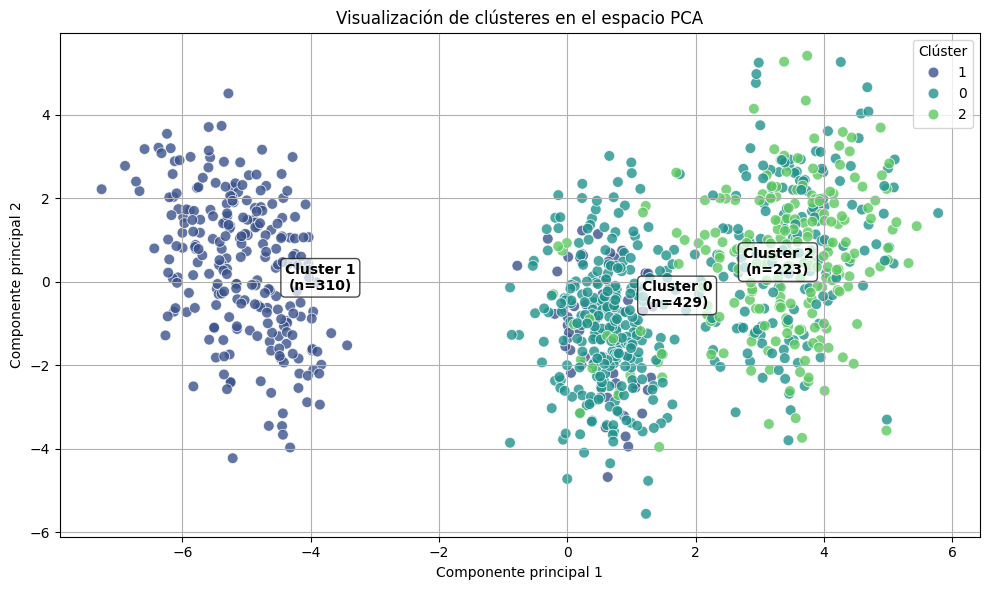

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(sdf.drop(columns=['cluster'], errors='ignore'))

# Creamos un DataFrame con las componentes principales y los clústeres
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = sdf['cluster'].astype(str)  # Convertimos a string para separar color por grupo

# Visualización
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='viridis', s=60, alpha=0.8)

# Mostrar centroides y número de puntos de cada clúster
centroids = pca_df.groupby('cluster')[['PCA1', 'PCA2']].mean()
for idx, row in centroids.iterrows():
    plt.text(row['PCA1'], row['PCA2'], f'Cluster {idx}\n(n={sum(pca_df["cluster"]==idx)})',
             ha='center', va='center', fontsize=10, fontweight='bold',
             bbox=dict(facecolor='white', alpha=0.7, boxstyle='round'))

plt.title("Visualización de clústeres en el espacio PCA")
plt.xlabel("Componente principal 1")
plt.ylabel("Componente principal 2")
plt.legend(title="Clúster")
plt.grid(True)
plt.tight_layout()
plt.show()


🔴 Podemos apreciar que éste algoritmo de clustering jerárquico (AgglomerativeClustering) tampoco ha sido más preciso, debido a que puede verse que el clúster 0, pese a estar un poco más separado del clúster 2 que con K-Means, ha capturado muchos puntos que sí eran del cluster 2, lo que sugiere una malinterpretación de alguna variable, lo que deja muy empequeñecido al clúster 2 (igualmente, el cluster 1 y 2 también "capturan" algunos puntos del cluster 0, pero en menor cantidad).

## Interpretación de las agrupaciones obtenidas

Este código crea un mapa de calor que muestra los valores promedio de cada característica para cada clúster, lo que puede ser útil para entender las diferencias y similitudes entre los clústeres encontrados por el algoritmo de agrupamiento.

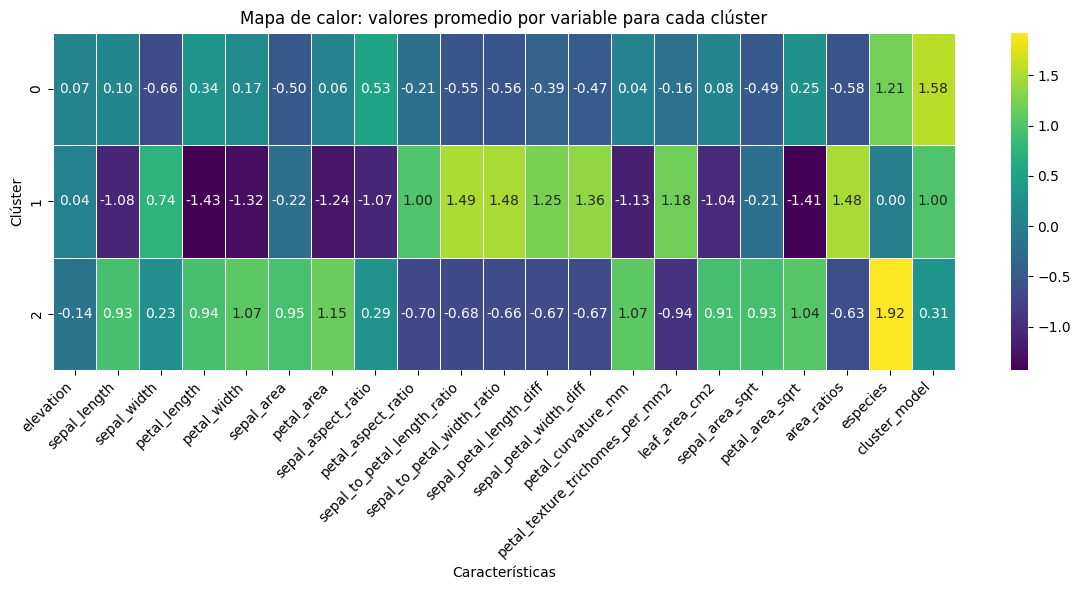

In [34]:
mean_features_by_cluster = sdf.groupby('cluster').mean()

# Creamos el mapa de calor
plt.figure(figsize=(12, 6))
sns.heatmap(mean_features_by_cluster, annot=True, cmap='viridis', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor: valores promedio por variable para cada clúster")
plt.xlabel("Características")
plt.ylabel("Clúster")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Este código crea un gráfico de barras con líneas de error que muestran los valores promedio y la desviación estándar de cada característica para cada clúster. Esto puede ser útil para entender las diferencias y similitudes entre los clústeres encontrados por el algoritmo de agrupamiento.

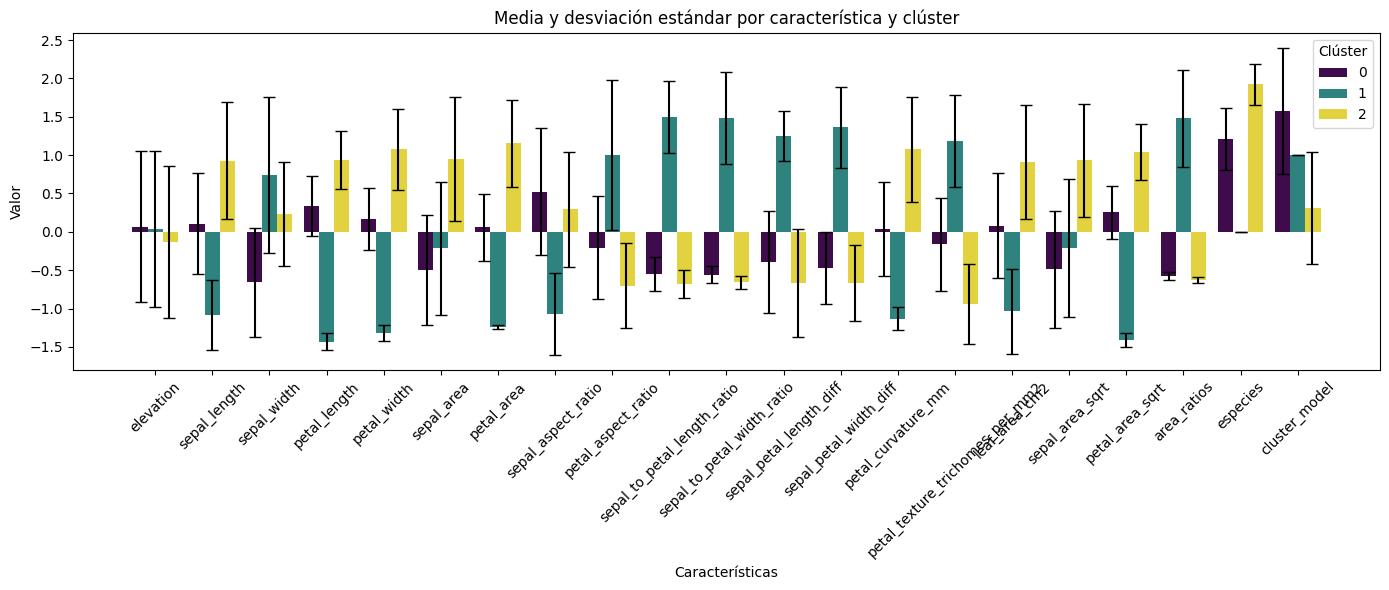

In [35]:
# Media y desviación estándar
mean_df = sdf.groupby('cluster').mean()
std_df = sdf.groupby('cluster').std()

# Reorganizamos los datos para graficarlos
mean_melted = mean_df.reset_index().melt(id_vars='cluster', var_name='Característica', value_name='Media')
std_melted = std_df.reset_index().melt(id_vars='cluster', var_name='Característica', value_name='Desviación estándar')

# Unimos ambos para tener las barras de error
data = pd.merge(mean_melted, std_melted, on=['cluster', 'Característica'])

# Graficamos
plt.figure(figsize=(14, 6))
sns.barplot(data=data, x='Característica', y='Media', hue='cluster', errorbar=None, palette='viridis', capsize=0.1)

# Añadimos manualmente las barras de error
for i in range(len(data)):
    x = i // len(mean_df)
    hue_offset = i % len(mean_df)
    plt.errorbar(x + hue_offset*0.25 - 0.25, data['Media'][i], yerr=data['Desviación estándar'][i], fmt='none', c='black', capsize=4)

plt.title('Media y desviación estándar por característica y clúster')
plt.ylabel('Valor')
plt.xlabel('Características')
plt.xticks(rotation=45)
plt.legend(title='Clúster')
plt.tight_layout()
plt.show()

🔴 De la misma manera que en el apartado de K-Means, podemos apreciar que cada una de las 3 especies (que corresponde a un clúster cada una) son muy distintas (a lo sumo, las especies 0 y 2 pueden tener algo de semejanza en los ratios, pero claramente no se parecerían en la realidad porque el resto de características físicas son distintas).

#🔴🔴 Conclusión

Durante la realización del ejercicio he sacado 2 conclusiones principales:


1.   El manejo de outliers mediante el método del rango intercuantílico (IQR) no ha dado un mejor resultado que Z-score. Me quedaría probar los métodos de Autoencoder o Isolation Forest (que requerían una normalización previa) para determinar cuál es mejor detectando outliers.
2.   Ninguno de los dos métodos de clusterización empleados en ésta actividad han sido lo suficientemente precisos, pero al ver que el que más se le acerca ha sido K-Means, con un Silhouette Score del modelo igual a 0.328, creo que la solución sería probar un algoritmo que no integre los puntos alrededor del centroide siguiendo un radio a lo largo de un círculo, tal vez DBSCAN, que además filtra también los outliers, o HDBSCAN.

